# Домашнее задание №3
## 1. Nussinov algorithm

In [31]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

In [44]:
def nussinov(seq, printing=0):
    """Nussinov algorithm function.

    RNA secondary structure prediction
    using complementary pairing maximisation."""

    def mprint(seq, m):
        n = len(m)
        for i in range(n + 1):
            if i == 0:
                print(' \t', end='')
                for j in range(n):
                    print(seq[j], end='\t')
            else:
                for j in range(n + 1):
                    if j == 0:
                        print(seq[i - 1], end='\t')
                    else:
                        print(m[i - 1, j - 1], end='\t')
            print()

    def is_pair(a, b):
        if (a, b) in (('A', 'U'), ('U', 'A'), ('C', 'G'), ('G', 'C')):
            return True
        else:
            return False

    # initialization
    n = len(seq)
    M = np.empty((n, n), dtype=int)
    M[:] = -1
    # 3 zeros diagonals
    for d in range(3):
        for i in range(n - d):
            M[i, i + d] = 0

    #trace forward by diagonals:
    for d in range(3, n):
        for i in range(n-d):
            inner = 0
            for k in range(i+1, i + d):
                if M[i, k] + M[k+1, i + d] > inner:
                    inner = M[i, k] + M[k+1, i + d]
            if is_pair(seq[i], seq[i + d]):
                paired = 1 + M[i + 1, i + d - 1]
            else:
                paired = 0
            M[i, i + d] = max(M[i + 1, i + d], M[i, i + d - 1], paired, inner)

    def traceback(i, j, M, seq):
        if M[i, j] == 0:
            return []
        if is_pair(seq[i], seq[j]) and M[i, j] == M[i + 1, j - 1] + 1:
            return [(i, j)] + traceback(i + 1, j - 1, M, seq)
        else:
            if M[i, j] == M[i + 1, j]:
                return traceback(i + 1, j, M, seq)
            elif M[i, j] == M[i, j - 1]:
                return traceback(i, j - 1, M, seq)
            else:
                for k in range(i + 1, j - 1):
                    if M[i, j] == M[i, k] + M[k + 1, j]:
                        return traceback(i, k, M, seq) + \
                               traceback(k + 1, j, M, seq)

    if printing:
        mprint(seq, M)

    return(traceback(0, n-1, M, seq))

In [100]:
def showRNAfold(seq, a):
    G = nx.Graph()

    nodes = []
    labels = {}
    
    for i in range(len(seq)):
        nodes += [i]
        labels[i] = str(i) +' '+seq[i]

    G.add_nodes_from(nodes)
    G.add_edges_from(a)
    
    color = {'A': '#ffceeb', 'U' : '#91a5ff', 'C' : '#A0CBE2', 'G' : '#b3fcc3'}
    
    color_map = []
    for node in G:
        color_map.append(color[seq[node]])
    
    nx.draw(G, pos=nx.circular_layout(G))
    nx.draw_circular(G, node_color=color_map, node_size=800, labels=labels)
    plt.axis('equal')
    plt.show

### Тест 0

[(2, 9), (4, 8)]
 	C	A	G	C	A	G	A	U	U	C	
C	0	0	0	0	0	1	1	1	2	2	
A	-1	0	0	0	0	0	0	1	2	2	
G	-1	-1	0	0	0	0	0	1	1	2	
C	-1	-1	-1	0	0	0	0	1	1	1	
A	-1	-1	-1	-1	0	0	0	1	1	1	
G	-1	-1	-1	-1	-1	0	0	0	0	1	
A	-1	-1	-1	-1	-1	-1	0	0	0	0	
U	-1	-1	-1	-1	-1	-1	-1	0	0	0	
U	-1	-1	-1	-1	-1	-1	-1	-1	0	0	
C	-1	-1	-1	-1	-1	-1	-1	-1	-1	0	


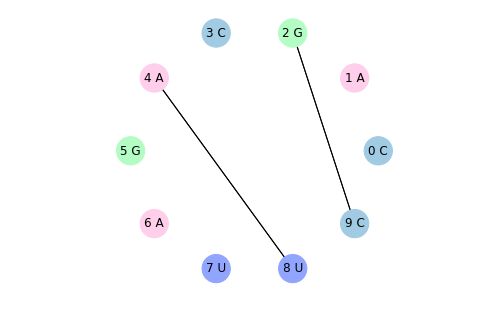

In [101]:
s ="CAGCAGAUUC"
print(nussinov(s))
showRNAfold(s, nussinov(s, printing=1))

### Тест 1

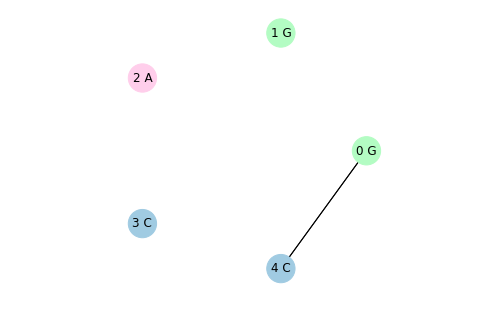

In [102]:
s = 'GGACC'
showRNAfold(s, nussinov(s))

### Тест 2

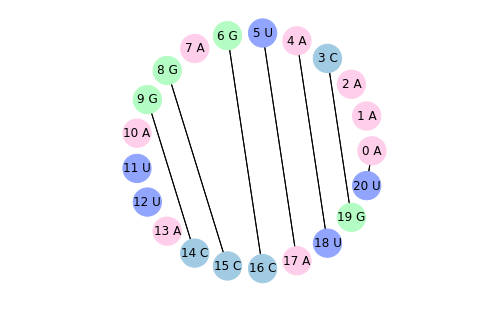

In [103]:
s = 'AAACAUGAGGAUUACCCAUGU'
showRNAfold(s, nussinov(s))

##  2. Сколько существует возможных укорененных и неукорененных топологий деревьев на N листьях?

Количество всех укоренённых деревьев:
$$N_r=(2n-3)\cdot (2n-5)\cdot (2n-7)\cdot ...\cdot 3\cdot 1={{(2n-3)!}\over {[2^{n-2}\cdot (n-2)!]}} = (2n - 3)!!$$
Количество всех неукоренённых деревьев:
$$N_u=(2n-5)\cdot (2n-7)\cdot ...\cdot 3\cdot 1={{(2n-5)!}\over {[2^{n-3}\cdot (n-3)!]}} = (2n - 5)!!$$

1. По индукции доказываем число всех возможных неукорененных деревьев. Индукционный переход от n к n+1 делаем за счет того, что чтобы получить новое уникальное дерево, подвесив  новый лист, мы должны подвесить его к уникальному ребру. Ребер в неукорененном дереве с n листями 2n-3.
$$(2n - 3)\cdot (2n-5)\cdot (2n-7)\cdot ...\cdot 3\cdot 1 = (2n - 3)\cdot (2n - 5)!! = (2(n+1) - 5)!!$$
2. Т.к. в неукорененном 2n - 3 рёбер, мы можем подвесить к корню 2n - 3 способами, следовательно $$N_r = (2n - 3)\cdot N_u = (2n - 3)!!$$